In [1]:
import sys
import h2o

In [2]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.3" 2019-04-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.3+12-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.3+12-LTS, mixed mode)
  Starting server from /home/praveen/miniconda3/envs/h2o/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiqo_4vdh
  JVM stdout: /tmp/tmpiqo_4vdh/h2o_praveen_started_from_python.out
  JVM stderr: /tmp/tmpiqo_4vdh/h2o_praveen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,"14 days, 8 hours and 43 minutes"
H2O cluster name:,H2O_from_python_praveen_e89vmy
H2O cluster total nodes:,1
H2O cluster free memory:,2.934 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
iris = h2o.import_file("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
iris.head(5)

C1,C2,C3,C4,C5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_grouped = iris.group_by(by=["C5"])

In [6]:
iris_grouped.mean()

GroupBy: 
  Frame: iris_data.hex; by=[4]
  Aggregates: dict_keys(['mean_C1', 'mean_C2', 'mean_C3', 'mean_C4'])
*** Use get_frame() to get groupby frame ***


In [7]:
iris_grouped.get_frame()

C5,mean_C1,mean_C2,mean_C3,mean_C4
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.77,4.26,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [8]:
from h2o.estimators.kmeans import H2OKMeansEstimator
kmeans_estimator = H2OKMeansEstimator(k=3, init='Random', seed=1618, standardize=True)

In [9]:
iris.col_names[0:-1]

['C1', 'C2', 'C3', 'C4']

In [10]:
#kmeans_estimator.train(training_frame=iris, x = [0,1,2,3])
kmeans_estimator.train(x=iris.col_names[0:-1], training_frame=iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [11]:
centers_frame = h2o.H2OFrame(kmeans_estimator.centers())

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
centers_frame

C1,C2,C3,C4
5.006,3.418,1.464,0.244
5.83393,2.67679,4.42143,1.43571
6.80682,3.12045,5.52273,1.98182


In [13]:
iris_grouped.get_frame()

C5,mean_C1,mean_C2,mean_C3,mean_C4
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.77,4.26,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<b> The means of the dimensions differ from the centroid co-ordinates in the following way: The means of individual dimensions are independently calculated and are not influenced by other dimensions. However, the centroids are (from a physical/geometric standpoint) the centers of mass of it's cluster. This means that the value of the centroid for a given dimension need not be the true mean of the data points, because other dimensions "pull/push" the centroid towards the center of mass for the cluster. </b>

In [14]:
predicted = kmeans_estimator.predict(iris)
predicted
iris['predicted'] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [15]:
import seaborn as sns
sns.set()

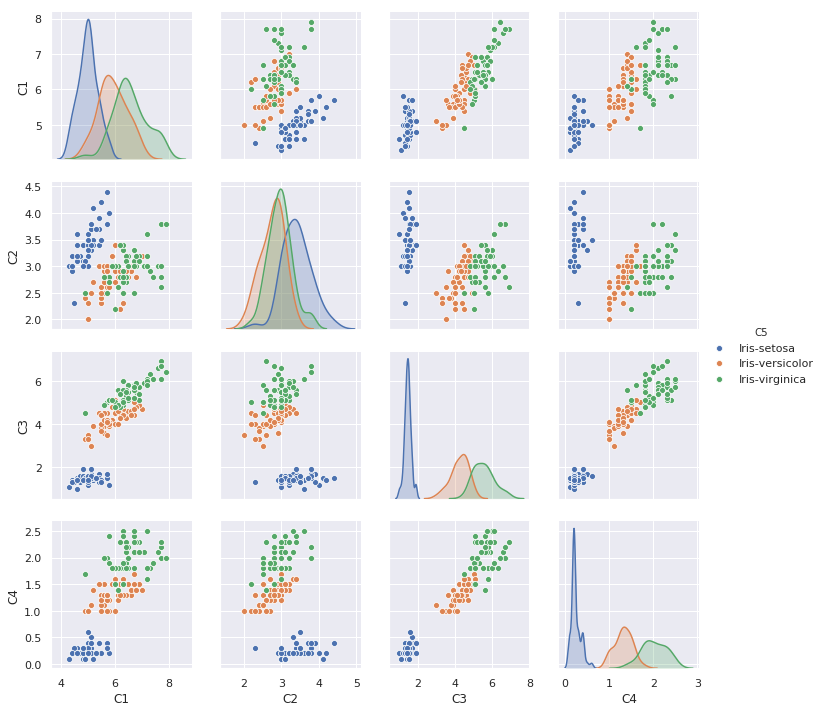

In [16]:
sns.pairplot(iris.as_data_frame(True), vars=["C1", "C2", "C3", "C4"],  hue="C5");

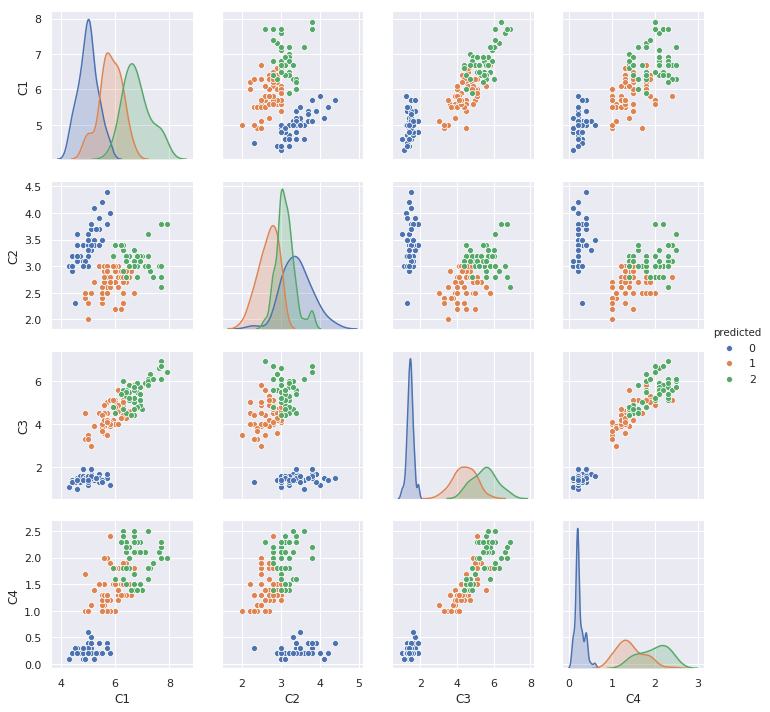

In [17]:
sns.pairplot(iris.as_data_frame(True), vars=["C1", "C2", "C3", "C4"],  hue="predicted");